In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [7]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [8]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [9]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,False,False,True


Select relevant variables from the data and split the data into a training, development, and test set.<br>
<br>
When splitting the data:<br>
- The **test_size** parameter controls the proportion of data that is assigned to the test set. In this case, 20% of the data is assigned to the test set.
- The **random_state** parameter ensures that the data is split consistently each time the code is run.
- The **dev_df**, **test_df** line further splits the test set into development and test sets. We do this because the development set is used to evaluate the model during training, while the test set is used to evaluate the model's performance on unseen data.

In [10]:
# Select the relevant variables
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
target = 'Survived'

# Split the data into training, development, and test sets.
train_df, test_df = train_test_split(titanic_df, test_size=0.2, random_state=42)
dev_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42)

# Display the shapes of the datasets
print(f"Training set shape: {train_df.shape}")
print(f"Development set shape: {dev_df.shape}")
print(f"Test set shape: {test_df.shape}")

Training set shape: (712, 14)
Development set shape: (89, 14)
Test set shape: (90, 14)


Train a decision tree and make a plot of it.<br>
Here we generate a plot of the Decision Tree, showing the decision nodes, splits and leaf nodes.<br>
<br>
About the Decision Tree plot:<br>
- The colors in the decision tree plot represent the different target classes, which in this case are **Not Survived** and **Survived**.
- The lighter shades of colours in the decision tree plot represent nodes that are less certain about their prediction, while the darker colours show more certainty.

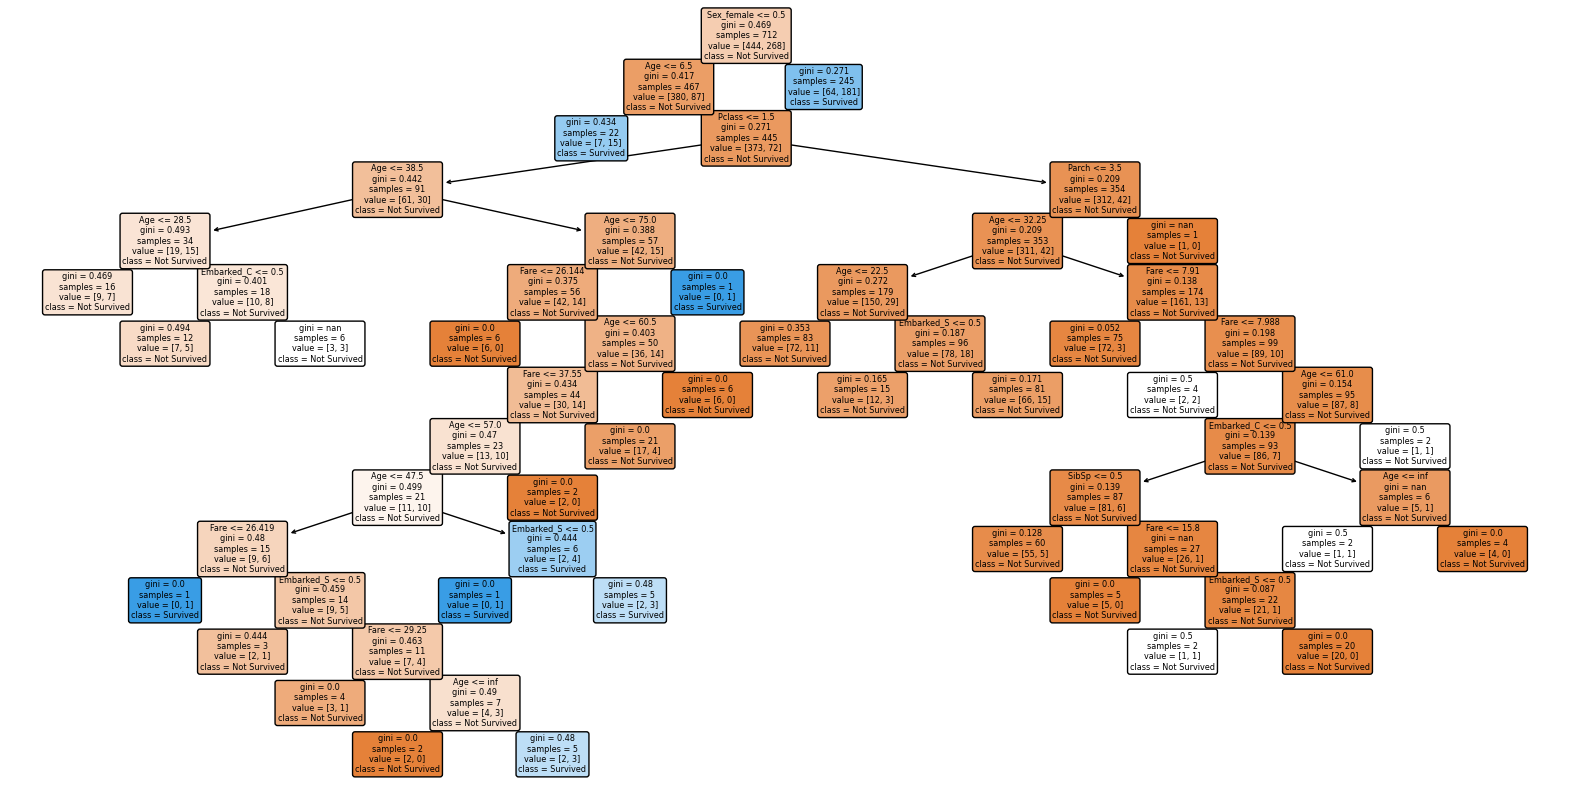

In [11]:
# Instantiate the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
dt_model.fit(train_df[features], train_df[target])

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_model, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.show()

Compute the model’s accuracy on the development set.<br>

In [12]:
# Predict the labels on the development set
dev_predictions = dt_model.predict(dev_df[features])

# Calculate accuracy on the development set
accuracy = accuracy_score(dev_df[target], dev_predictions)

print(f"Model Accuracy on Development Set: {accuracy:.4f}")

Model Accuracy on Development Set: 0.8315


Accuracy is a measure of how often the model's predictions are correct.<br>
In this case, the model's accuracy is 0.8315, which means that it correctly classified 83.15% of the data points in the development set.<br>
It is important to note that the accuracy on the development set is not a guarantee of the model's performance on real-world data. However, it is a useful measure of the model's ability to learn from data and make predictions on unseen data.


- Try building your model with different values of the max_depth [2-10]. At each step, create a plot of your tree and store the accuracies on both the training and development data.
- Plot a line of your training accuracies and another of your development accuracies in the same graph. Write down what shape the lines have and
what this shape means.

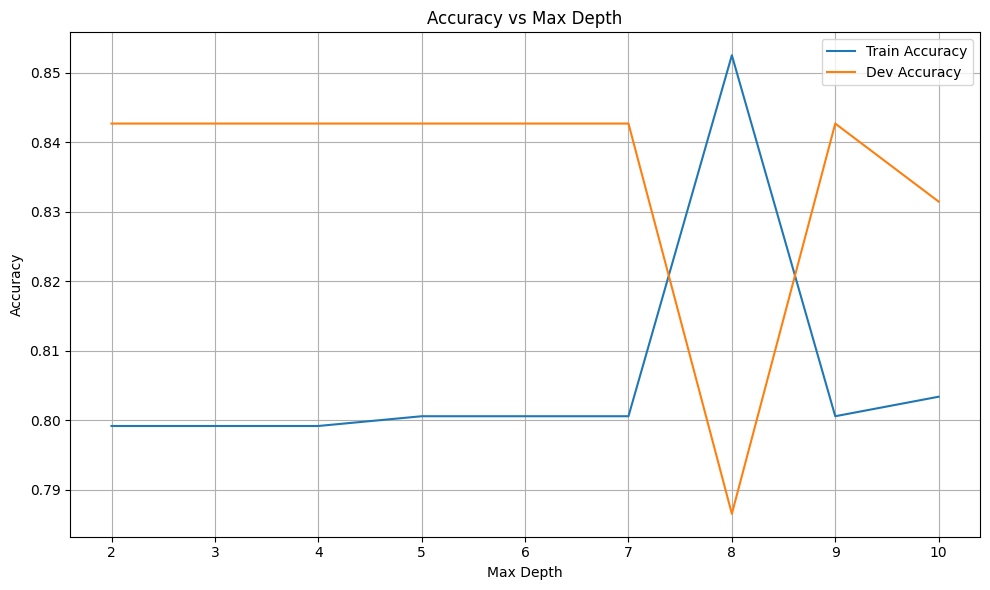

Max Depth: 2, Train Accuracy: 0.7992, Dev Accuracy: 0.8427
Max Depth: 3, Train Accuracy: 0.7992, Dev Accuracy: 0.8427
Max Depth: 4, Train Accuracy: 0.7992, Dev Accuracy: 0.8427
Max Depth: 5, Train Accuracy: 0.8006, Dev Accuracy: 0.8427
Max Depth: 6, Train Accuracy: 0.8006, Dev Accuracy: 0.8427
Max Depth: 7, Train Accuracy: 0.8006, Dev Accuracy: 0.8427
Max Depth: 8, Train Accuracy: 0.8525, Dev Accuracy: 0.7865
Max Depth: 9, Train Accuracy: 0.8006, Dev Accuracy: 0.8427
Max Depth: 10, Train Accuracy: 0.8034, Dev Accuracy: 0.8315


In [13]:
# Define a range of max_depth values to experiment with
max_depth_values = range(2, 11)

# Initialize empty lists to store accuracies
train_accuracies = []
dev_accuracies = []

# Loop through different max_depth values
for max_depth in max_depth_values:
    # Instantiate the Decision Tree model with the current max_depth
    dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

    # Train the model on the training set
    dt_model.fit(train_df[features], train_df[target])

    # Predict the labels on the training set
    train_predictions = dt_model.predict(train_df[features])

    # Calculate accuracy on the training set
    train_accuracy = accuracy_score(train_df[target], train_predictions)
    train_accuracies.append(train_accuracy)

    # Predict the labels on the development set
    dev_predictions = dt_model.predict(dev_df[features])

    # Calculate accuracy on the development set
    dev_accuracy = accuracy_score(dev_df[target], dev_predictions)
    dev_accuracies.append(dev_accuracy)

# Plot the accuracies vs max_depth
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracies, label='Train Accuracy')
plt.plot(max_depth_values, dev_accuracies, label='Dev Accuracy')

# Add labels and title
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Display accuracies
for depth, train_acc, dev_acc in zip(max_depth_values, train_accuracies, dev_accuracies):
    print(f"Max Depth: {depth}, Train Accuracy: {train_acc:.4f}, Dev Accuracy: {dev_acc:.4f}")


Our code is performing a turning process known as hyperparemeter tuning, which is to try out different values on our model to find the best set of values that optimize the model's performance. In our case we are using the **max_depth** over a range of 2 to 10, which controls the maximum depth of the tree.<br>
<br>
From our results, the best accuracy was achived is at Max Depth: 8, Train Accuracy: 0.8525, Dev Accuracy: 0.7865.<br>
<br>
To explain more what the results mean. A deeper Decision Tree can potentially capture more complex relationships in the data, but it is also more prone to overfitting. Overfitting occurs when a model learns the training data too well and is unable to generalize to new data.
<br>
A max_depth of 7 or less resulted in underfitting, which means that the model did not learn the data well enough. A max_depth of 9 or more resulted in overfitting, which means that the model learned the training data too well and was unable to generalize to new data.<br>
<br>
As you can see from the graph, the accuracy on the development set peaks at a max_depth of 8, which further supports the conclusion that this was the best choice for this model.<br>
https://www.kdnuggets.com/2019/08/understanding-decision-trees-classification-python.html<br>
https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680

Report the accuracy of your final model on the test data.

In [14]:

# Choose the max_depth for the final model based on the analysis
final_max_depth = 8  # Choose the max_depth with the best trade-off between train and dev accuracy

# Instantiate the final Decision Tree model
final_dt_model = DecisionTreeClassifier(max_depth=final_max_depth, random_state=42)

# Train the final model on the entire training set
final_dt_model.fit(train_df[features], train_df[target])

# Predict the labels on the test set
test_predictions = final_dt_model.predict(test_df[features])

# Calculate accuracy on the test set
test_accuracy = accuracy_score(test_df[target], test_predictions)

# Report the accuracy on the test data
print(f"Final Model Test Accuracy (Max Depth={final_max_depth}): {test_accuracy:.4f}")


Final Model Test Accuracy (Max Depth=8): 0.7556


The final max depth (which is the best max_depth) is the value that provides the best trade-off between training and development accuracy based on our analysis.<br>
The reported test accuracy of 0.7556 suggests that the model has learned to generalize well to new data.
